# Projet perso

In [155]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import folium
from collections import Counter
from collections import OrderedDict
import plotly.express as px

## 1/ Data Cleaning

In [95]:

path_file = os.path.join("c:\\", 'Users', 'celin','.ipython','PROJET PERSO','restaurant_data_kaggles.csv')
path_file= os.path.normpath(path_file)
df=pd.read_csv("restaurant_data_kaggles.csv", sep = ',')
df.head(5)


,restaurant_name,review_number,food_type,ranking,overallRating,wifi,livraison,average_price,lat,lng,district
0,le Neuvième Art,626 avis,Française Européenne Végétariens bienvenus,Nº 1 sur 3 058 Restaurants à Lyon,5.0,yes,yes,85 € -145 €,45.76849365234375,4.85646390914917,69006 Lyon
1,Aromatic,601 avis,Française Européenne Végétariens bienvenus,Nº 2 sur 3 058 Restaurants à Lyon,5.0,yes,no,18 € -41 €,45.77438735961914,4.830961227416992,69004 Lyon
2,Le Boeuf d'Argent,482 avis,Française Européenne Végétariens bienvenus,Nº 3 sur 3 058 Restaurants à Lyon,4.5,no,no,no informations,45.76266098022461,4.826900005340576,69005 Lyon
3,Le Comptoir des Cousins,205 avis,Française Européenne Sud-américaine,Nº 4 sur 3 058 Restaurants à Lyon,5.0,yes,no,13 € -28 €,45.76849365234375,4.85646390914917,69006 Lyon
4,Le Book-Lard,204 avis,Française Brasserie gastronomique Végétarien...,Nº 5 sur 3 058 Restaurants à Lyon,5.0,yes,no,13 € -40 €,45.76708984375,4.845279216766357,69006 Lyon


##### 1ères observations (shape, info, etc)
---

In [96]:
df.shape

(3058, 11)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   restaurant_name   3058 non-null   object
 1   review_number     3058 non-null   object
 2    food_type        3058 non-null   object
 3    ranking          3058 non-null   object
 4    overallRating    3058 non-null   object
 5    wifi             3058 non-null   object
 6    livraison        3058 non-null   object
 7    average_price    3058 non-null   object
 8    lat              3058 non-null   object
 9    lng              3058 non-null   object
 10   district         3058 non-null   object
dtypes: object(11)
memory usage: 262.9+ KB


In [98]:
df.nunique()

restaurant_name     2939
review_number        441
 food_type           478
 ranking            2801
 overallRating        11
 wifi                  2
 livraison             2
 average_price       395
 lat                 196
 lng                 196
 district             74
dtype: int64

In [99]:
df.columns

Index(['restaurant_name ', 'review_number ', ' food_type ', ' ranking ',
       ' overallRating  ', ' wifi ', ' livraison ', ' average_price ', ' lat ',
       ' lng ', ' district '],
      dtype='object')

In [100]:
df.isna().any(axis=0)

restaurant_name     False
review_number       False
 food_type          False
 ranking            False
 overallRating      False
 wifi               False
 livraison          False
 average_price      False
 lat                False
 lng                False
 district           False
dtype: bool

In [101]:
df.isna().sum()

restaurant_name     0
review_number       0
 food_type          0
 ranking            0
 overallRating      0
 wifi               0
 livraison          0
 average_price      0
 lat                0
 lng                0
 district           0
dtype: int64

In [102]:
df.describe()

,restaurant_name,review_number,food_type,ranking,overallRating,wifi,livraison,average_price,lat,lng,district
count,3058,3058,3058,3058,3058,3058,3058,3058,3058,3058,3058
unique,2939,441,478,2801,11,2,2,395,196,196,74
top,McDonald's,no information,no information,no_information,4.0,no,no,no information,45.77438735961914,4.830961227416992,69002 Lyon
freq,21,252,1084,250,848,2742,2764,2129,116,116,502


##### Nommage de la df et des colonnes
---

In [103]:
df_resto_lyon = df.rename(columns={'restaurant_name ' : 'nom_restaurant', 'review_number ':'nombre_d_avis', ' food_type ':'type_nouriture', ' ranking ':'classement',
       ' overallRating  ':'note', ' wifi ':'wifi', ' livraison ':'livraison', ' average_price ':'prix_moyen', ' lat ':'latitude', ' lng ':'longitude', ' district ':'arrondissement'})
df_resto_lyon

,nom_restaurant,nombre_d_avis,type_nouriture,classement,note,wifi,livraison,prix_moyen,latitude,longitude,arrondissement
0,le Neuvième Art,626 avis,Française Européenne Végétariens bienvenus,Nº 1 sur 3 058 Restaurants à Lyon,5.0,yes,yes,85 € -145 €,45.76849365234375,4.85646390914917,69006 Lyon
1,Aromatic,601 avis,Française Européenne Végétariens bienvenus,Nº 2 sur 3 058 Restaurants à Lyon,5.0,yes,no,18 € -41 €,45.77438735961914,4.830961227416992,69004 Lyon
2,Le Boeuf d'Argent,482 avis,Française Européenne Végétariens bienvenus,Nº 3 sur 3 058 Restaurants à Lyon,4.5,no,no,no informations,45.76266098022461,4.826900005340576,69005 Lyon
3,Le Comptoir des Cousins,205 avis,Française Européenne Sud-américaine,Nº 4 sur 3 058 Restaurants à Lyon,5.0,yes,no,13 € -28 €,45.76849365234375,4.85646390914917,69006 Lyon
4,Le Book-Lard,204 avis,Française Brasserie gastronomique Végétarien...,Nº 5 sur 3 058 Restaurants à Lyon,5.0,yes,no,13 € -40 €,45.76708984375,4.845279216766357,69006 Lyon
...,...,...,...,...,...,...,...,...,...,...,...
3053,Pronto Pizzas,no information,Pizza,no_information,no information,no,no,5 € -15 €,45.76837158203125,4.938692092895508,69150 Decines-Charpieu Lyon
3054,Le Café Lumière,no information,Française Européenne Albanaise,no_information,no information,no,no,11 € -24 €,45.769161224365234,4.987874984741211,69150 Decines-Charpieu Lyon
3055,Le Café Lumière,no information,no information,no_information,no information,no,no,no information,45.769161224365234,4.987874984741211,69150 Decines-Charpieu Lyon
3056,Demeures Et Seminaires,no information,no information,no_information,no information,no,no,no information,no information,no information,28330 Charbonnières-les-Bains Lyon


##### Remplacer les données categorielles manuscrites en chiffre pour simplifier l'analyse
#####  yes = 1, no= 0
---

In [104]:
df_resto_lyon.loc[df_resto_lyon.livraison == 'no','livraison'] = 0
df_resto_lyon.loc[df_resto_lyon.livraison == 'yes','livraison'] = 1

df_resto_lyon.loc[df_resto_lyon.wifi == 'no','wifi'] = 0
df_resto_lyon.loc[df_resto_lyon.wifi == 'yes','wifi'] = 1

df_resto_lyon.loc[df_resto_lyon.latitude == 'no information','latitude'] = 0
df_resto_lyon.loc[df_resto_lyon.longitude == 'no information','longitude'] = 0

##### Analyses
---

<!-- 
nom_restaurant : nom du restaurant
nombre_d_avis : notre d'avis
type_nouriture : type de nouriture
classement : classement des restaurants sur Lyon
note : note sur 5 points
wifi : presence ou non de la wifi
livraison : livraison
prix_moyen : prix moyen
arrondissement : arrondissement des restaurants
Latitude : latitude du restaurant
Longitude : longitude du restaurant du dataset sur l'ensemble des 3059 restaurants présents sur Lyon . -->


In [105]:
df_resto_lyon = df_resto_lyon.replace(r'^\s*$', np.nan, regex=True)

In [106]:
def test_float(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
df_resto_lyon.latitude.apply(test_float)

0       True
1       True
2       True
3       True
4       True
        ... 
3053    True
3054    True
3055    True
3056    True
3057    True
Name: latitude, Length: 3058, dtype: bool

In [107]:
df_resto_lyon[~df_resto_lyon.latitude.apply(test_float)]

,nom_restaurant,nombre_d_avis,type_nouriture,classement,note,wifi,livraison,prix_moyen,latitude,longitude,arrondissement


In [108]:
df_resto_lyon.columns


Index(['nom_restaurant', 'nombre_d_avis', 'type_nouriture', 'classement',
       'note', 'wifi', 'livraison', 'prix_moyen', 'latitude', 'longitude',
       'arrondissement'],
      dtype='object')

In [109]:
df_resto_lyon.shape

(3058, 11)

In [110]:
# df_resto_lyon.drop(df_resto_lyon[df_resto_lyon == False].index, inplace=True)

In [111]:
df_resto_lyon[~df_resto_lyon.note.apply(test_float)]

,nom_restaurant,nombre_d_avis,type_nouriture,classement,note,wifi,livraison,prix_moyen,latitude,longitude,arrondissement
2806,Brooklyn Burgers,no information,no information,Nº 2 718 sur 3 058 Restaurants à Lyon,no information,0,0,no information,45.77476119995117,4.805241107940674,69009 Lyon
2807,PHONE APERO,no information,Vietnamienne Bar à vins,Nº 29 sur 36 Restaurants à Vaulx en Velin,no information,0,0,no information,45.77484130859375,4.914850234985352,69120 Vaulx en Velin Lyon
2808,Les Cuisiniers du Marche,no information,no information,Nº 2 754 sur 3 058 Restaurants à Lyon,no information,0,0,no information,45.77438735961914,4.830961227416992,69001 Lyon
2809,Le Foch,no information,Française Café,Nº 2 768 sur 3 058 Restaurants à Lyon,no information,1,0,11 € -18 €,45.769676208496094,4.8437042236328125,69006 Lyon
2810,L'Etourdi,no information,Française,Nº 2 791 sur 3 058 Restaurants à Lyon,no information,0,0,no information,45.7598876953125,4.830905914306641,69002 Lyon
...,...,...,...,...,...,...,...,...,...,...,...
3053,Pronto Pizzas,no information,Pizza,no_information,no information,0,0,5 € -15 €,45.76837158203125,4.938692092895508,69150 Decines-Charpieu Lyon
3054,Le Café Lumière,no information,Française Européenne Albanaise,no_information,no information,0,0,11 € -24 €,45.769161224365234,4.987874984741211,69150 Decines-Charpieu Lyon
3055,Le Café Lumière,no information,no information,no_information,no information,0,0,no information,45.769161224365234,4.987874984741211,69150 Decines-Charpieu Lyon
3056,Demeures Et Seminaires,no information,no information,no_information,no information,0,0,no information,0,0,28330 Charbonnières-les-Bains Lyon


In [112]:
df_resto_lyon.shape

(3058, 11)

In [113]:
data = df_resto_lyon[df_resto_lyon['type_nouriture'].notnull()]

In [114]:
data = df_resto_lyon['type_nouriture'].str.replace("|","")
data = df_resto_lyon['note'].str.replace("|","")

C:\Users\celin\AppData\Local\Temp/ipykernel_17340/2034080874.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\celin\AppData\Local\Temp/ipykernel_17340/2034080874.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [115]:
df_resto_lyon.shape

(3058, 11)

#### ou sont les restaurants les mieux notés sur Lyon?

In [116]:
# analys par groupe des meilleurs notes
datrating = df_resto_lyon.loc[df_resto_lyon['note'] != 'no information']
datrating['note'] = datrating.note.astype(float)
datrating = datrating.loc[datrating['note'] > 4.5]
datrating

C:\Users\celin\AppData\Local\Temp/ipykernel_17340/512545403.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nom_restaurant,nombre_d_avis,type_nouriture,classement,note,wifi,livraison,prix_moyen,latitude,longitude,arrondissement
0,le Neuvième Art,626 avis,Française Européenne Végétariens bienvenus,Nº 1 sur 3 058 Restaurants à Lyon,5.0,1,1,85 € -145 €,45.76849365234375,4.85646390914917,69006 Lyon
1,Aromatic,601 avis,Française Européenne Végétariens bienvenus,Nº 2 sur 3 058 Restaurants à Lyon,5.0,1,0,18 € -41 €,45.77438735961914,4.830961227416992,69004 Lyon
3,Le Comptoir des Cousins,205 avis,Française Européenne Sud-américaine,Nº 4 sur 3 058 Restaurants à Lyon,5.0,1,0,13 € -28 €,45.76849365234375,4.85646390914917,69006 Lyon
4,Le Book-Lard,204 avis,Française Brasserie gastronomique Végétarien...,Nº 5 sur 3 058 Restaurants à Lyon,5.0,1,0,13 € -40 €,45.76708984375,4.845279216766357,69006 Lyon
7,Epicurius,91 avis,Méditerranéenne Végétariens bienvenus,Nº 8 sur 3 058 Restaurants à Lyon,5.0,0,0,no informations,45.76605987548828,4.8321309089660645,69001 Lyon
...,...,...,...,...,...,...,...,...,...,...,...
2396,Porte de Tunis,1 avis,Méditerranéenne Tunisienne,Nº 2 397 sur 3 058 Restaurants à Lyon,5.0,0,0,no information,45.763099670410156,4.8345232009887695,69002 Lyon
2424,Le Café Saint Germain,3 avis,Française Bar à bières Café,Nº 2 425 sur 3 058 Restaurants à Lyon,5.0,0,0,12 € -20 €,45.76968002319336,4.850240230560303,69006 Lyon
2515,Le Simone,6 avis,no information,Nº 2 516 sur 3 058 Restaurants à Lyon,5.0,0,0,no information,45.75048828125,4.826393127441406,69002 Lyon
2708,Chez Olivia,1 avis,Chinoise Asiatique,Nº 2 709 sur 3 058 Restaurants à Lyon,5.0,1,1,5 € -15 €,45.75190353393555,4.8284430503845215,69002 Lyon


In [117]:
#analysis group by low rating
datrating_low = df_resto_lyon.loc[df_resto_lyon['note'] != 'no information']
datrating_low = datrating_low.loc[datrating_low['note'] < str(2.0)]

In [118]:
# top 5 des arrondissements lyonnais ou il y a le plus de restaurants

k=0
arr=[]
while k<len(df_resto_lyon['arrondissement']):
    arr+=Counter(df_resto_lyon['arrondissement'][k].split()).most_common()
    k+=1
subclass_arr = [j for j in arr if j[0] != 'Lyon' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Villeurbanne' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Saint-Priest' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'en' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Vaulx' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Velin' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Bron' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Chaponnay' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Decines-Charpieu' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Charbonni\xc3\xa8res-les-Bains' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Limonest' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Chassieu' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Ecully' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Francheville' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'LYON' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'lyon' ]
subclass_arr = [j for j in subclass_arr if j[0] != 'Charbonnières-les-Bains  ' ]

val_arr=  OrderedDict(sorted(Counter(subclass_arr).most_common(5), key=lambda t: t[1],reverse=False)).values()
keys_arr=  OrderedDict(sorted(Counter(subclass_arr).most_common(5), key=lambda t: t[1],reverse=False)).keys()
keys_list = [x[0] for x in keys_arr]

# plt.figure(figsize=(10,10))
fig=px.histogram(y=list(keys_list), x= list(val_arr),text_auto=True, color=list(val_arr))
fig.update_layout(title_text='Top 5 des arrondissements Lyonnais où se trouve le plus de restaurants',
xaxis_title_text='Nombre de restaurants', 
yaxis_title_text='Arrondissements')
fig.update_layout(showlegend=False)
fig.show()


<AxesSubplot:xlabel='count', ylabel='note'>

<Figure size 1800x1800 with 0 Axes>

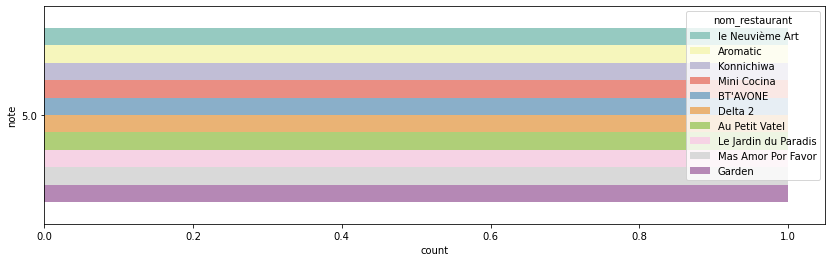

In [119]:
k1=0
arr1=[]
while k1<len(df_resto_lyon['arrondissement']):
    arr1+=Counter(df_resto_lyon['arrondissement'][k1].split()).most_common()
    k1+=1
subclass_arr1 = [j for j in arr if j[0] != 'Lyon' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Villeurbanne' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Saint-Priest' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'en' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Vaulx' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Velin' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Bron' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Chaponnay' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Decines-Charpieu' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Charbonni\xc3\xa8res-les-Bains' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Limonest' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Chassieu' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Ecully' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Francheville' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'LYON' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'lyon' ]
subclass_arr1 = [j for j in subclass_arr if j[0] != 'Charbonnières-les-Bains  ' ]

val_arr1=  OrderedDict(sorted(Counter(subclass_arr1).most_common(10), key=lambda t: t[1],reverse=True)).values()
keys_arr1=  OrderedDict(sorted(Counter(subclass_arr1).most_common(10), key=lambda t: t[1],reverse=True)).keys()
keys_list1 = [x[0] for x in keys_arr1]

# best restaurant & top area
plt.figure(figsize=(25,25))
nobu =datrating.loc[datrating["note"] != '4.5']
fig, (axis1) = plt.subplots(1,figsize=(14,4))

sns.countplot(y='note',hue='nom_restaurant', data = nobu.sort_values(by='note',ascending=False)[:10], palette="Set3", ax=axis1)



In [120]:
d1 =df_resto_lyon.groupby('prix_moyen').size()

In [161]:
df_resto_lyon.groupby(by=['prix_moyen']).sum().groupby(level=[0]).cumsum()

C:\Users\celin\AppData\Local\Temp/ipykernel_17340/2068769891.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.



,wifi,livraison
prix_moyen,,
10 € -112 €,2,2
10 € -13 €,2,3
10 € -14 €,1,1
10 € -15 €,2,3
10 € -16 €,2,1
...,...,...
Scandinave,0,0
Tunisienne,0,0
cambodgienne,0,0


In [158]:
df_resto_lyon['prix_moyen'].value_counts()

no information    2129
10 € -20 €          22
Bar à vins          22
9 € -15 €           19
10 € -30 €          17
                  ... 
3 € -22 €            1
11 € -13 €           1
18 € -41 €           1
14 € -36 €           1
11 € -24 €           1
Name: prix_moyen, Length: 395, dtype: int64

In [121]:
d1

prix_moyen
10 € -112 €           2
10 € -13 €            5
10 € -14 €            1
10 € -15 €            8
10 € -16 €            2
                   ... 
Scandinave            1
Tunisienne            1
cambodgienne          2
no information     2129
no informations       8
Length: 395, dtype: int64

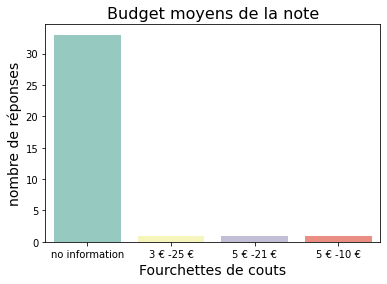

In [122]:
prix_low = df_resto_lyon.loc[df_resto_lyon['prix_moyen'] != 'no information']
prix_low = df_resto_lyon.loc[df_resto_lyon['prix_moyen'] != 'no informations']
prix_low = datrating_low.loc[datrating_low['prix_moyen'] != object]

sns.countplot(x='prix_moyen', data = prix_low, palette="Set3")
plt.title('Budget moyens de la note', fontsize=16)
plt.xlabel('Fourchettes de couts', fontsize=14)
plt.ylabel('nombre de réponses', fontsize=14)
plt.show()


In [142]:
data = df_resto_lyon['type_nouriture'].str.replace("|","")
i=0
#fonction split permet de recuperer pour chaque ligne les mot separé (ex: (un chat) deviens (un:1),(chat:1))
#on stock ces mot dans un tableau que l'on nomme u 
u=[]
while i<len(data):
    u+=Counter(data[i].split()).most_common()
    i+=1
    
#supprime les mot inutiles ou repetitif de la list u pour pouvoir realiser de meilleures analyses 
subclass = [j for j in u if j[0] != 'no' ]

subclass = [j for j in subclass if j[0] != 'de' ]

subclass = [j for j in subclass if j[0] != 'à' ]

subclass = [j for j in subclass if j[0] != 'bienvenus' ]

subclass = [j for j in subclass if j[0] != 'restauration' ]
subclass = [j for j in subclass if j[0] != 'Restauration' ]

subclass = [j for j in subclass if j[0] != '&' ]

subclass = [j for j in subclass if j[0] != 'food' ]

subclass = [j for j in subclass if j[0] != 'cuisine' ]

subclass = [j for j in subclass if j[0] != 'rue' ]

subclass = [j for j in subclass if j[0] != 'choix' ]

subclass = [j for j in subclass if j[0] != 'plats' ]

subclass = [j for j in subclass if j[0] != 'gluten' ]

subclass = [j for j in subclass if j[0] != 'sans' ]

subclass = [j for j in subclass if j[0] != 'Saine' ]

subclass = [j for j in subclass if j[0] != 'information' ]

C:\Users\celin\AppData\Local\Temp/ipykernel_17340/1868580442.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

